### Stock Forecaster Test 2

In [1]:
from lib.forecast2 import StockForecast
import matplotlib.pyplot as plt
import pandas as pd
import time
from datetime import datetime
from lib.scraper import StockScraper

In [2]:
scraper = StockScraper("SPY", interval="1d", period="10y")
scraper.from_yahoo()
scraper.data.shape, scraper.data.columns

((2518, 8),
 Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
        'Capital Gains'],
       dtype='object'))

<Axes: xlabel='Date'>

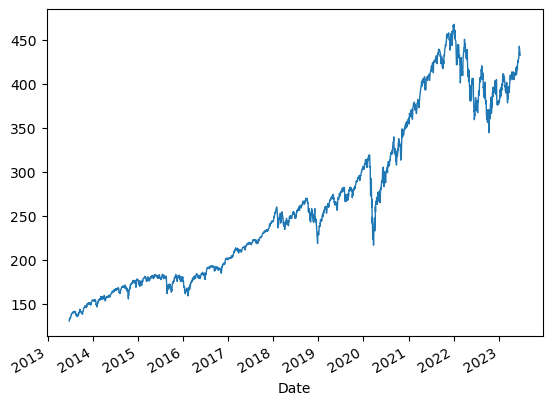

In [3]:
scraper.data["Open"].plot(linewidth=1)

In [4]:
train_on = ["Open", "High", "Low", "Close", "Volume"]
target = ["Close"]
chart_train_column = 0

sf = StockForecast(
    epochs=1000,lr=0.0005, 
    num_prediction_seq=20, num_training_seq=100,
    hidden_size=10, 
    gpu_device="mps", 
    train_on=train_on, target=target
)

sf.load(scraper.data, start_at = 0)
sf.normalize()
sf.sequence(batch_size=20, shuffle=True)
sf.create_model()

In [5]:
sf.total_samples, sf.X_train.shape[0]

(2518, 2518)

In [6]:
train_loss, test_loss = sf.train(debug_freq=25)

Epoch: 0, train loss: 0.07819026076079656, test loss: 0.005404165731026576
Epoch: 25, train loss: 0.0006799548974851388, test loss: 0.0019061345553312164
Epoch: 50, train loss: 0.0005960069387651014, test loss: 0.001898840141411011
Epoch: 75, train loss: 0.0005737220538624873, test loss: 0.0018879263572251568
Epoch: 100, train loss: 0.0005766529041769294, test loss: 0.002078303431447309
Epoch: 125, train loss: 0.0005279372528969327, test loss: 0.001983222605373997
Epoch: 150, train loss: 0.0005089933244259252, test loss: 0.0018363595367051088
Epoch: 175, train loss: 0.00047875454927432455, test loss: 0.0018609933680496537
Epoch: 200, train loss: 0.0004570481474662234, test loss: 0.001664363510476855
Epoch: 225, train loss: 0.0004580689918064443, test loss: 0.001721331907901913
Epoch: 250, train loss: 0.00043370945517111706, test loss: 0.00179583601689396
Epoch: 275, train loss: 0.0004324104900458931, test loss: 0.0015723969420203222
Epoch: 300, train loss: 0.000405068248828347, test lo

KeyboardInterrupt: 

#### Train Model

In [ ]:
import matplotlib.pyplot as plt

# plt.plot(train_loss, label="loss", linewidth=0.5)
plt.plot(test_loss, label="test loss", linewidth=0.5)
plt.legend()

plt.show()

#### Validate

In [ ]:
output = sf.lstm(sf.test_dataset.data)

out_scale = sf.mm.inverse_transform(output[:].detach().numpy())
train_set = sf.ss.inverse_transform(sf.test_dataset.data[:,-1])

predict = []  # [None] * 20
predict.extend(out_scale[:, -1])
plt.plot(train_set[:, 0], label="actual", alpha=0.5, linewidth=1)
plt.plot(predict, label="predict", linewidth=1)
plt.legend()
plt.show()

In [ ]:
sf.test_dataset.data.size(), out_scale.size / len(out_scale)

In [ ]:
original = sf.raw_data[-72:]["Close"].reset_index(drop=True)
actual = sf.ss.inverse_transform(sf.test_dataset.data[:,-1])[:,0][-50:]

predict = []  # [None] * 20
predict.extend(out_scale[:,-1].tolist()[-50:])
future = [None] * (len(predict)-1)
future.extend(out_scale[-1,:].tolist())
plt.plot(original, label="original", linewidth=1.5, c="k", alpha=0.3)
plt.plot(actual, label="trainer", linewidth=1, c="g")
plt.plot(predict, label="predict", linewidth=1, alpha=0.8, c="r")
plt.plot(future, label="future", linewidth=1, c="b")
plt.legend()
plt.show()